# IMPORTING LIBRARIES

In [1]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from math import sqrt
#from sklearn.feature_selection import VarianceThreshold
import warnings

#Machine model Algorithm module
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from sklearn.tree import plot_tree,DecisionTreeRegressor
import catboost as cb
import joblib
import pickle as pkl

#Performance metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_auc_score,RocCurveDisplay,auc,roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support,plot_confusion_matrix,log_loss,accuracy_score,f1_score

# IMPORTING THE DATA

In [2]:
#IMPORTING THE DATASET USING PANDAS LIBRARIES
df = pd.read_csv("weatherAUS.csv")

In [3]:
#DISPLAYS THE FIRST FIVE ROWS OF THE DATA
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
#DISPLAYS THE LAST FIVE ROWS OF THE DATA
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [5]:
#DESCRIPTION OF THE DATA
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
#INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# DATA PREPROCESSING

In [7]:
#SPLITTING OF DATA SEPARATELY INTO DAY,MONTH,YEAR
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [8]:
#DIMENSION OF THE DATASET
df.shape

(142193, 26)

In [9]:
#DESCRIPTION OF THE DATASET AFTER SPLIITING THE DATE
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,year,month,day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


In [10]:
#INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [11]:
#CONVERTING THE FEATURES OF 'RainTomorrow' AND 'RainToday'INTO CATEGORICAL DATA
LE=LabelEncoder()
df['RainTomorrow']=LE.fit_transform(df['RainTomorrow'])
df['RainToday']=LE.fit_transform(df['RainToday'])
df['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int32

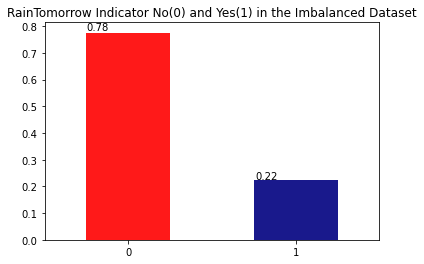

In [12]:
#VISUALIZING THE IMBALANCE DATA
import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (20,5))
ax=df['RainTomorrow'].value_counts(normalize = True).plot(kind='bar', color= ['RED','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

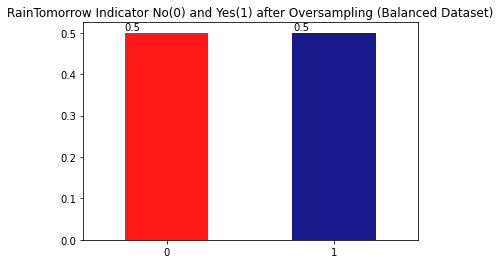

In [13]:
#BALANCING THE IMBALANCED DATA AND VISUALIZING IT
from sklearn.utils import resample

no = df[df['RainTomorrow'] == 0]
yes = df[df['RainTomorrow'] == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
df_1 = pd.concat([no, yes_oversampled])

#fig = plt.figure(figsize = (20,5))
ax=df_1.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['RED','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

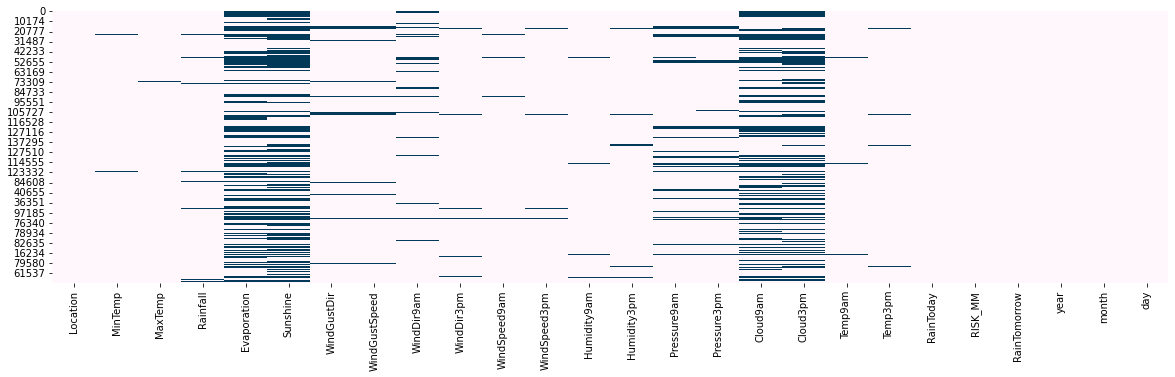

In [14]:
# MISSING DATA PATTERN IN TRAINING DATA
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(df_1.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [15]:
#COLLECTING THE OBJECT DATATYPE OF THE FEATURES IN THE DATASET
lb=[i for i in df_1.columns if(df_1[i].dtype=='object')]
lb

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [16]:
df_1['Location'].mode()[0]

'Portland'

In [17]:
# IMPUTE cATEGORICAL VARIABLE WITH MODE
df_1['Location'] = df_1['Location'].fillna(df_1['Location'].mode()[0])
df_1['WindGustDir'] = df_1['WindGustDir'].fillna(df_1['WindGustDir'].mode()[0])
df_1['WindDir9am'] = df_1['WindDir9am'].fillna(df_1['WindDir9am'].mode()[0])
df_1['WindDir3pm'] = df_1['WindDir3pm'].fillna(df_1['WindDir3pm'].mode()[0])

# LABEL ENCODING

In [18]:
# CONVERTING THE OBJECT TYPE FEATURES INTO CATEGORIAL DATA USING LABEL ENCODING 
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in lb:
    lencoders[col] = LabelEncoder()
    df_1[col] = lencoders[col].fit_transform(df_1[col])

In [19]:
#INFORMATION OF THE DATASET AFTER LABEL ENCODING
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220632 entries, 0 to 23751
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       220632 non-null  int32  
 1   MinTemp        219542 non-null  float64
 2   MaxTemp        220151 non-null  float64
 3   Rainfall       217606 non-null  float64
 4   Evaporation    125307 non-null  float64
 5   Sunshine       115921 non-null  float64
 6   WindGustDir    220632 non-null  int32  
 7   WindGustSpeed  205400 non-null  float64
 8   WindDir9am     220632 non-null  int32  
 9   WindDir3pm     220632 non-null  int32  
 10  WindSpeed9am   218470 non-null  float64
 11  WindSpeed3pm   216354 non-null  float64
 12  Humidity9am    217547 non-null  float64
 13  Humidity3pm    214620 non-null  float64
 14  Pressure9am    199012 non-null  float64
 15  Pressure3pm    199013 non-null  float64
 16  Cloud9am       139244 non-null  float64
 17  Cloud3pm       134974 non-null

In [20]:
#DIMENSION OF THE DATASET AFTER OVERSAMPLING
df_1.shape

(220632, 26)

In [21]:
# FILLING THE NULL VALUES WITH MEAN VALUES
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df = df_1.copy(deep=True) 
mice_imputer = IterativeImputer()
df.iloc[:, :] = mice_imputer.fit_transform(df_1)

# CORRELATION OF THE DATASET

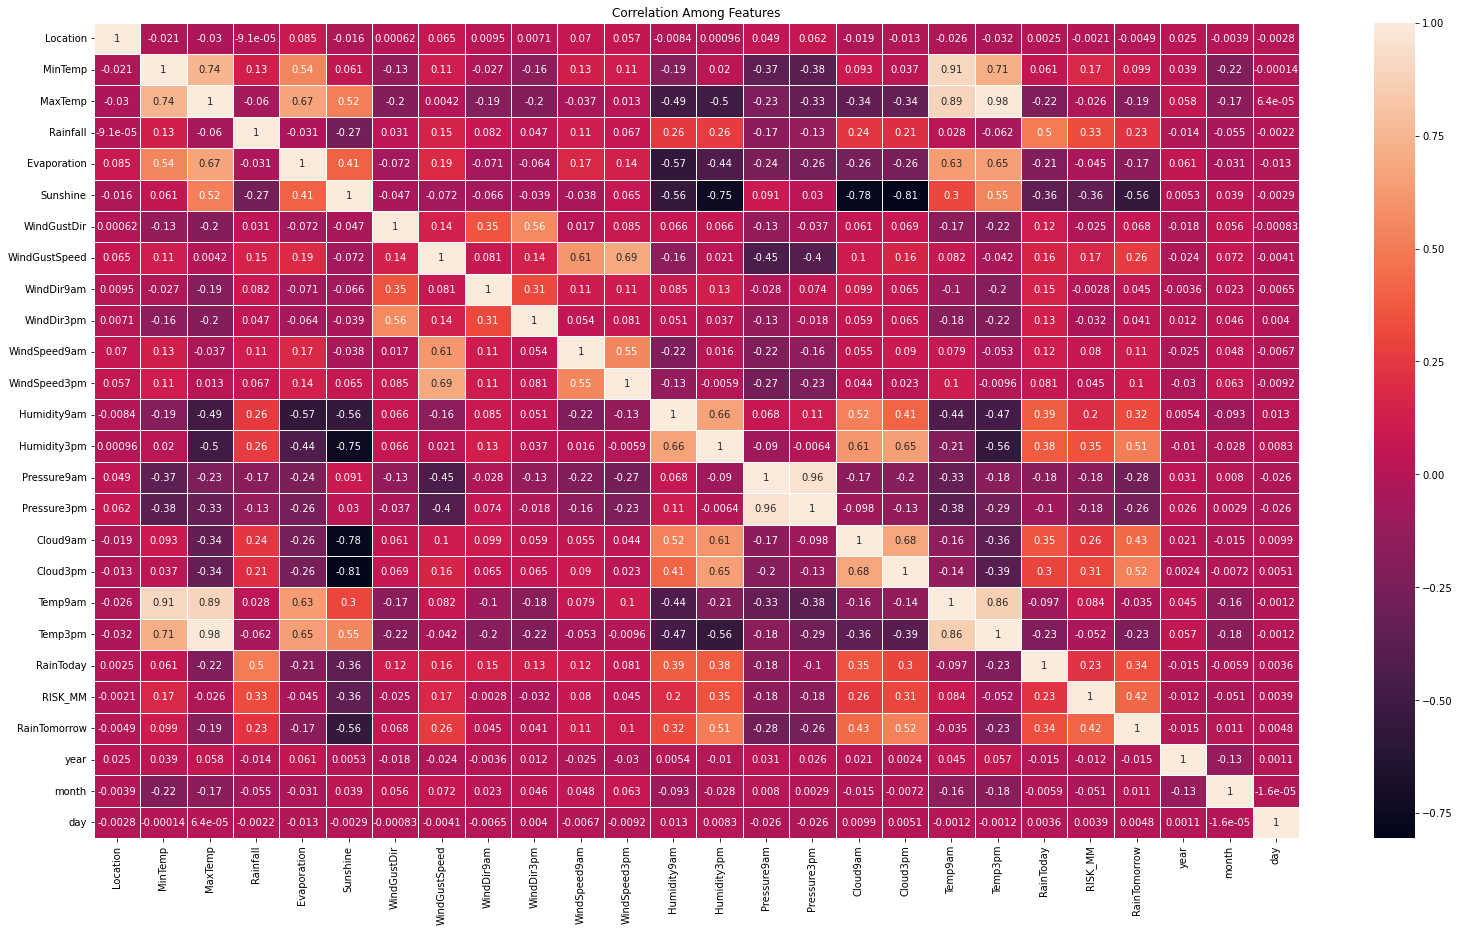

In [22]:
plt.figure(figsize=(27,15))
plt.title("Correlation Among Features")
sns.heatmap(df.corr(),linewidths=1,annot=True)
plt.show()

In [23]:
# DROPPING THE FEATURES
df.drop(['RISK_MM','Location','year'],axis=1,inplace=True,)#(['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm','RISK_MM','WindSpeed9am','WindSpeed3pm','Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [24]:
#DISPLAYS THE DATATYPE OF THE DATASET
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
month            float64
day              float64
dtype: object

# CORRELATION OF DATASET AFTER DROPPING THE VALUES

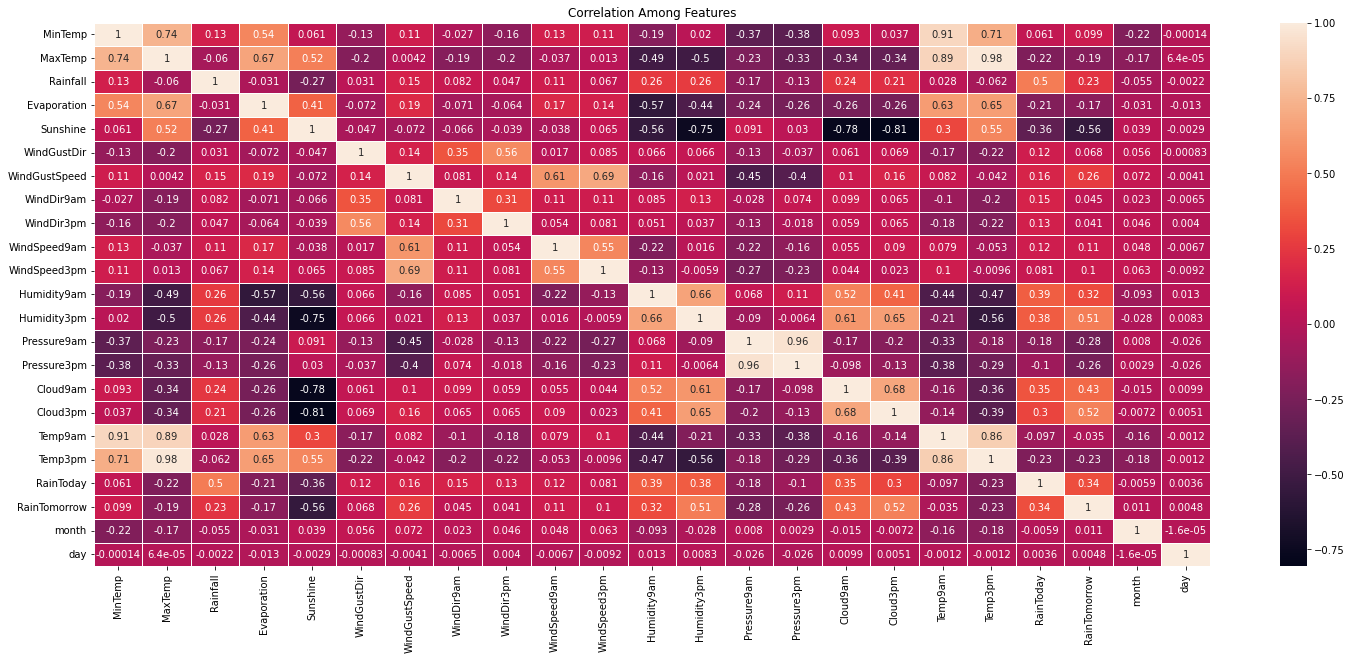

In [25]:
#CORRELATION OF THE DATASET AFTER DROPPING THE VALUES
plt.figure(figsize=(25,10))
plt.title("Correlation Among Features")
sns.heatmap(df.corr(),linewidths=1,annot=True)
plt.show()

# SPLITTING THE DATA INTO TRAINING  AND TESTING DATA

In [26]:
y = df['RainTomorrow']
x = df.loc[:, df.columns != 'RainTomorrow']
# Split into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [27]:
dfx=pd.DataFrame()
dfx=pd.concat([x_test,y_test],axis=1)
dfx.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,day,RainTomorrow
7783,14.2,28.7,0.0,6.200000,9.722767,12.0,28.0,11.0,8.0,7.0,...,1014.9,1012.3,7.000000,1.000000,20.0,27.8,0.0,4.0,24.0,0.0
99554,10.2,31.4,0.0,4.000000,7.300000,3.0,50.0,4.0,5.0,15.0,...,1018.5,1013.6,6.000000,7.000000,18.0,29.3,0.0,4.0,20.0,1.0
57677,5.9,18.9,0.0,3.263743,10.816348,4.0,37.0,1.0,5.0,13.0,...,1027.7,1024.2,1.000000,1.000000,12.0,18.4,0.0,9.0,2.0,0.0
140983,16.0,35.0,0.0,10.755774,12.388343,0.0,44.0,0.0,9.0,33.0,...,1016.4,1010.7,0.569803,2.019014,25.1,32.8,0.0,1.0,7.0,0.0
37502,2.7,26.5,0.0,5.200000,12.200000,4.0,26.0,0.0,9.0,15.0,...,1027.5,1021.4,0.000000,2.000000,12.3,26.0,0.0,10.0,19.0,0.0


In [28]:
dfx.shape

(44127, 23)

In [29]:
dfx.to_csv("rainDS.csv")

# RandomForestClassifier

In [30]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,day
0,13.400000,22.9,0.6,6.081846,7.547448,13.0,44.000000,13.0,14.0,20.0,...,22.0,1007.700000,1007.100000,8.000000,4.797959,16.9,21.8,0.0,12.0,1.0
1,7.400000,25.1,0.0,5.977130,11.589744,14.0,44.000000,6.0,15.0,4.0,...,25.0,1010.600000,1007.800000,1.887912,2.618589,17.2,24.3,0.0,12.0,2.0
2,12.900000,25.7,0.0,8.072243,12.379501,15.0,46.000000,13.0,15.0,19.0,...,30.0,1007.600000,1008.700000,1.967838,2.000000,21.0,23.2,0.0,12.0,3.0
3,9.200000,28.0,0.0,6.302247,11.869772,4.0,24.000000,9.0,0.0,11.0,...,16.0,1017.600000,1012.800000,1.374088,2.117562,18.1,26.5,0.0,12.0,4.0
4,17.500000,32.3,1.0,7.390963,6.148796,13.0,41.000000,1.0,7.0,7.0,...,33.0,1010.800000,1006.000000,7.000000,8.000000,17.8,29.7,0.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16163,18.427142,20.0,77.6,5.097800,-0.722351,13.0,57.560955,9.0,9.0,28.0,...,96.0,1013.229681,1012.008905,8.000000,8.000000,19.0,18.6,1.0,3.0,1.0
44739,5.000000,16.0,13.8,6.600000,4.200000,11.0,70.000000,12.0,8.0,17.0,...,53.0,987.400000,993.900000,7.000000,7.000000,8.8,15.0,1.0,11.0,23.0
10169,12.600000,17.3,29.4,1.000000,0.628325,0.0,48.000000,12.0,9.0,19.0,...,86.0,1023.300000,1018.500000,8.000000,8.000000,13.6,16.2,1.0,6.0,28.0
6662,17.900000,32.2,12.6,10.600000,8.616095,12.0,59.000000,9.0,3.0,7.0,...,52.0,1007.100000,1000.700000,7.000000,1.000000,21.0,29.9,1.0,12.0,26.0


In [31]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16163    1.0
44739    1.0
10169    1.0
6662     1.0
23751    1.0
Name: RainTomorrow, Length: 220632, dtype: float64

In [32]:
df.shape

(220632, 23)

In [33]:
model_rf= RandomForestClassifier(max_depth=16,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16)

In [34]:
ypreds_rf=model_rf.predict(x_test)
ypreds_rf

array([0., 1., 0., ..., 0., 0., 1.])

In [35]:
model_rf.score(x_test,y_test)

0.933328800960863

In [36]:
f2=f1_score(y_test,model_rf.predict(x_test))
lgls=log_loss(y_test, model_rf.predict_proba(x_test))
acc=accuracy_score(y_test, model_rf.predict(x_test))
rac=roc_auc_score(y_test, model_rf.predict(x_test))
f2,lgls,rac,acc

(0.9353093803597344,
 0.21489244196576313,
 0.9332648103203204,
 0.933328800960863)

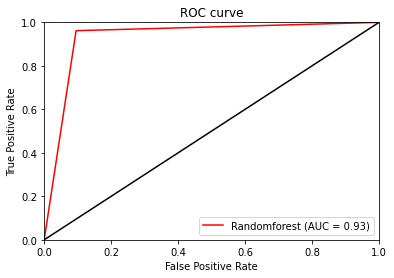

In [37]:

fpr, tpr, thresholds = roc_curve(y_test, ypreds_rf)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Randomforest')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

# K-FOLD VALIDATION

In [51]:
#Kfold
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)
scores=[]
for i,j in folds.split(x,y):
    X_train, X_test, Y_train, Y_test=x.iloc[i],x.iloc[j],y.iloc[i],y.iloc[j]
    model1 = RandomForestClassifier(max_depth=16,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
    model1.fit(X_train, Y_train)
    scores.append(model1.score(X_test,Y_test))
    
print(np.mean(scores))

0.9099812887258892


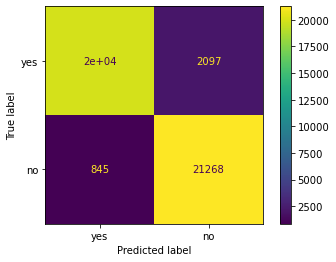

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,model_rf.predict(x_test)),display_labels=['yes','no'])
disp.plot()
plt.show()

In [39]:
joblib.dump(model_rf,"RainPredictModelRF.sav")

['RainPredictModelRF.sav']

In [58]:
pkl.dump(model_rf,open('model.pkl','wb'))

# XGBoostClassifier

In [41]:
warnings.filterwarnings("ignore")
model_xgb =XGBClassifier(n_estimators= 500,max_depth= 16)
model_xgb.fit(x_train, y_train)

[09:49:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=16, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
ypreds_xgb=model_xgb.predict(x_test)
ypreds_xgb

array([0., 1., 0., ..., 1., 0., 1.])

In [43]:
model_xgb.score(x_test,y_test)

0.9641489337593764

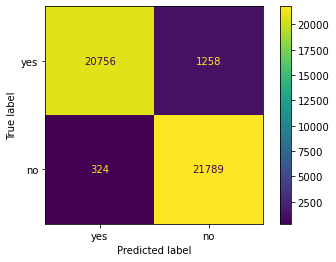

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,model_xgb.predict(x_test)),display_labels=['yes','no'])
disp.plot()
plt.show()

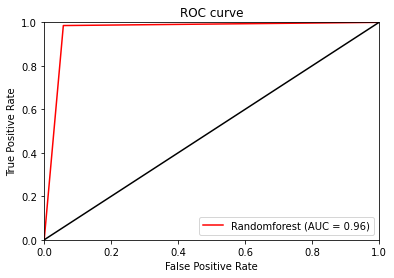

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, ypreds_xgb)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Randomforest')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

In [46]:
joblib.dump(model_xgb,"RainPredictModelXGB.sav")

['RainPredictModelXGB.sav']

In [59]:
pkl.dump(model_xgb,open('model1.pkl','wb'))

In [60]:
#Kfold
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)
scores=[]
for i,j in folds.split(x,y):
    X_train, X_test, Y_train, Y_test=x.iloc[i],x.iloc[j],y.iloc[i],y.iloc[j]
    model1 =XGBClassifier(n_estimators= 500,max_depth= 16)
    model1.fit(X_train, Y_train)
    scores.append(model1.score(X_test,Y_test))
print(np.mean(scores))

[15:23:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Catboost classifier 

In [48]:
model_cb = cb.CatBoostClassifier(iterations= 50,max_depth=16)
model_cb.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4422079	total: 7.99s	remaining: 6m 31s
1:	learn: 0.3544875	total: 13.8s	remaining: 5m 30s
2:	learn: 0.3180940	total: 19.3s	remaining: 5m 2s
3:	learn: 0.2989342	total: 24.7s	remaining: 4m 43s
4:	learn: 0.2784137	total: 30.1s	remaining: 4m 30s
5:	learn: 0.2536192	total: 35.6s	remaining: 4m 21s
6:	learn: 0.2334697	total: 41.2s	remaining: 4m 12s
7:	learn: 0.2183881	total: 46.8s	remaining: 4m 5s
8:	learn: 0.2064658	total: 52.1s	remaining: 3m 57s
9:	learn: 0.1905161	total: 57.5s	remaining: 3m 50s
10:	learn: 0.1748138	total: 1m 2s	remaining: 3m 43s
11:	learn: 0.1676155	total: 1m 8s	remaining: 3m 36s
12:	learn: 0.1538585	total: 1m 14s	remaining: 3m 31s
13:	learn: 0.1427976	total: 1m 20s	remaining: 3m 26s
14:	learn: 0.1368670	total: 1m 26s	remaining: 3m 21s
15:	learn: 0.1293418	total: 1m 31s	remaining: 3m 15s
16:	learn: 0.1217895	total: 1m 38s	remaining: 3m 11s
17:	learn: 0.1150566	total: 1m 43s	remaining: 3m 4s
18:	learn: 0.1041249	total: 1m 49s	remaining: 

In [49]:
ypreds_cb=model_cb.predict(x_test)
ypreds_cb

array([0., 1., 0., ..., 1., 0., 1.])

In [50]:
model_cb.score(x_test,y_test)

0.9496000181294899

In [51]:
f2=f1_score(y_test,model_cb.predict(x_test))
lgls=log_loss(y_test, model_cb.predict_proba(x_test))
acc=accuracy_score(y_test, model_cb.predict(x_test))
rac=roc_auc_score(y_test, model_cb.predict(x_test))
f2,lgls,rac,acc

(0.9512772203478946,
 0.14377100070935972,
 0.9495275678159298,
 0.9496000181294899)

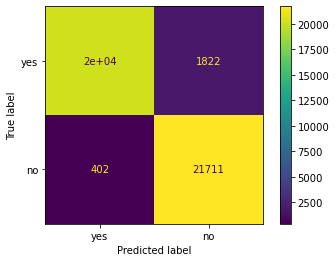

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,model_cb.predict(x_test)),display_labels=['yes','no'])
disp.plot()
plt.show()

In [53]:
joblib.dump(model_cb,"RainPredictModelCB.sav")

['RainPredictModelCB.sav']

In [60]:
pkl.dump(model_cb,open('model2.pkl','wb'))

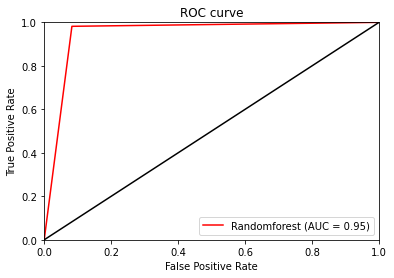

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, ypreds_cb)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Randomforest')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

In [61]:
#Kfold
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)
scores=[]
for i,j in folds.split(x,y):
    X_train, X_test, Y_train, Y_test=x.iloc[i],x.iloc[j],y.iloc[i],y.iloc[j]
    model1 =cb.CatBoostClassifier(iterations= 50,max_depth=16)
    model1.fit(X_train, Y_train)
    scores.append(model1.score(X_test,Y_test))
print(np.mean(scores))

Learning rate set to 0.5
0:	learn: 0.4398194	total: 6.57s	remaining: 5m 21s
1:	learn: 0.3573870	total: 12.7s	remaining: 5m 4s
2:	learn: 0.3178787	total: 18.8s	remaining: 4m 54s
3:	learn: 0.2873071	total: 25.5s	remaining: 4m 53s
4:	learn: 0.2648893	total: 31.8s	remaining: 4m 45s
5:	learn: 0.2449550	total: 38s	remaining: 4m 38s
6:	learn: 0.2268446	total: 44s	remaining: 4m 30s
7:	learn: 0.2050586	total: 50.3s	remaining: 4m 24s
8:	learn: 0.1925337	total: 56.1s	remaining: 4m 15s
9:	learn: 0.1777992	total: 1m 2s	remaining: 4m 10s
10:	learn: 0.1691310	total: 1m 8s	remaining: 4m 3s
11:	learn: 0.1620704	total: 1m 14s	remaining: 3m 57s
12:	learn: 0.1529795	total: 1m 21s	remaining: 3m 50s
13:	learn: 0.1434532	total: 1m 27s	remaining: 3m 44s
14:	learn: 0.1331828	total: 1m 33s	remaining: 3m 38s
15:	learn: 0.1250509	total: 1m 39s	remaining: 3m 32s
16:	learn: 0.1188227	total: 1m 46s	remaining: 3m 26s
17:	learn: 0.1102600	total: 1m 52s	remaining: 3m 19s
18:	learn: 0.1059999	total: 1m 58s	remaining: 3m

7:	learn: 0.2141750	total: 42.3s	remaining: 3m 42s
8:	learn: 0.1921212	total: 47.3s	remaining: 3m 35s
9:	learn: 0.1797840	total: 52.4s	remaining: 3m 29s
10:	learn: 0.1652408	total: 57.4s	remaining: 3m 23s
11:	learn: 0.1544851	total: 1m 2s	remaining: 3m 17s
12:	learn: 0.1442643	total: 1m 7s	remaining: 3m 11s
13:	learn: 0.1306128	total: 1m 12s	remaining: 3m 6s
14:	learn: 0.1235359	total: 1m 17s	remaining: 3m 1s
15:	learn: 0.1163893	total: 1m 22s	remaining: 2m 56s
16:	learn: 0.1101428	total: 1m 28s	remaining: 2m 51s
17:	learn: 0.1024627	total: 1m 33s	remaining: 2m 46s
18:	learn: 0.0985649	total: 1m 39s	remaining: 2m 41s
19:	learn: 0.0941682	total: 1m 44s	remaining: 2m 36s
20:	learn: 0.0894815	total: 1m 49s	remaining: 2m 31s
21:	learn: 0.0841144	total: 1m 55s	remaining: 2m 26s
22:	learn: 0.0787204	total: 2m	remaining: 2m 21s
23:	learn: 0.0748169	total: 2m 6s	remaining: 2m 16s
24:	learn: 0.0707669	total: 2m 11s	remaining: 2m 11s
25:	learn: 0.0662153	total: 2m 17s	remaining: 2m 6s
26:	learn: